In [1]:
# 1. Load and scale data
import pandas as pd
stk_data = pd.read_csv("Tatacoffee13_21.csv")
column = "Close"

In [2]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data[[column]])
print("Len:", data1.shape)

Len: (2225, 1)


In [3]:
# Split into train-test (80-20)
training_size = int(len(data1) * 0.8)
X_train = data1[:training_size]
y_test = data1[training_size:]
print("X_train length:", len(X_train))
print("y_test length:", len(y_test))

X_train length: 1780
y_test length: 445


In [4]:
# Different (p,d,q) and values to test
orders = [(1, 0, 1), (1, 1, 1), (2, 1, 1), (1, 0, 2)]


In [5]:
for i in orders:
    from statsmodels.tsa.statespace.sarimax import SARIMAX

    model = SARIMAX(X_train, order=i, seasonal_order=(1,1,1,12))
    model_fit = model.fit()
       # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    
    

C:\Anaconda3\envs\ts_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE-Testset: 0.07379766659979592
maPe-Testset: 23260097925.94786


C:\Anaconda3\envs\ts_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE-Testset: 0.07211198865863805
maPe-Testset: 9959289034.483221


C:\Anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\ts_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda3\envs\ts_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE-Testset: 0.0712648063263382
maPe-Testset: 10252438160.984304


C:\Anaconda3\envs\ts_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE-Testset: 0.07497942449402394
maPe-Testset: 24802427584.86431


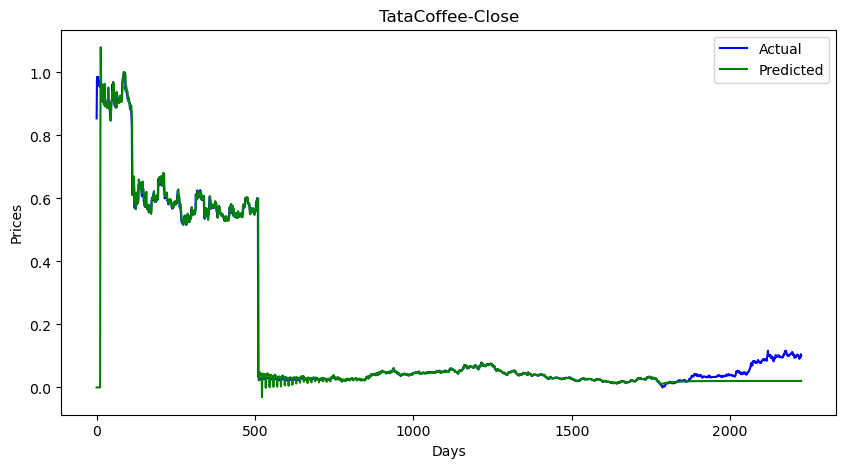

In [6]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [7]:
len(data1)

2225

In [8]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [9]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

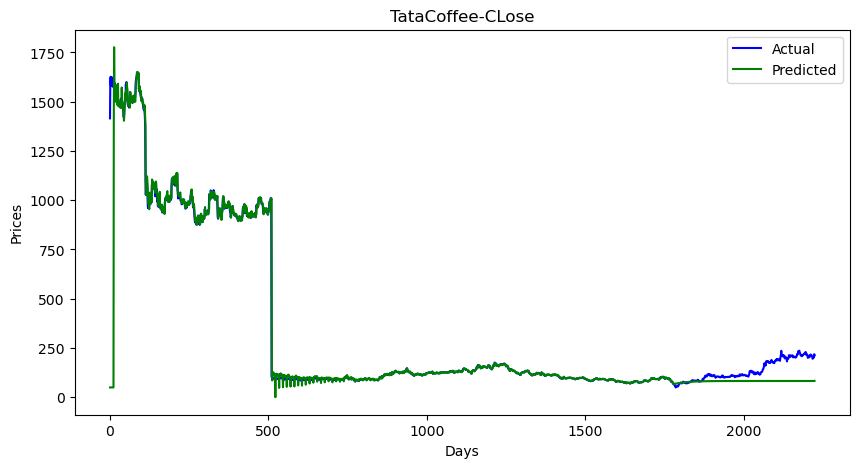

In [10]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [11]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 119.87710388104547
maPe-Testset: 0.10179552749271571


In [12]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [13]:
forecast

array([0.02056088, 0.02037811, 0.02045112, 0.02084453])

In [14]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [15]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [16]:
forecast_stock_price_test_oriF

,Closefore
0,82.272739
1,81.98053
2,82.097257
3,82.72624
